In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'testing images')
pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_09_11_2024_TA_matlab'

WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[0, 255, 0],
                  [23, 80, 150],
                  [150, 31, 23],
                  [199, 196, 147],
                  [23, 80, 151],
                  [255, 255, 255],
                  [242, 167, 227]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...


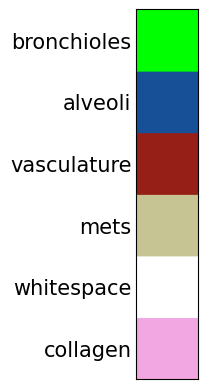

In [3]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [4]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 4: 2024-02-26 10.36.39
 annotation data previously loaded
Image 2 of 4: 84 - 2024-02-26 10.33.40
 annotation data previously loaded
Image 3 of 4: TVNTC 1-2 2
 annotation data previously loaded
Image 4 of 4: TVWT 4-1 1
 annotation data previously loaded


In [ ]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 29303100.0 pixels of bronchioles, 8% of the most common class.
 There are 125561600.0 pixels of alveoli, 37% of the most common class.
 There are 20736100.0 pixels of vasculature, 6% of the most common class.
 There are 33200800.0 pixels of mets, 9% of the most common class.
 There are 335117300.0 pixels of whitespace. This is the most common class.
 There are 21986600.0 pixels of collagen, 6% of the most common class.

Building training tiles...


In [ ]:
train_segmentation_model(pthDL, fine_tune=False)

In [ ]:
test_segmentation_model(pthDL,pthtest, pthtestim)

In [ ]:
classify_images(pthim,pthDL)

In [ ]:
quantify_images(pthDL, pthim)